In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [279]:
ξ = np.array([[0/12,0.2**2],
              [3/12,0.2**2],
              [6/12,0.2**2],
              [9/12,0.**2]])
# ξ = np.array([[0/12,0.02]])
ρ,ν,H,ɛ = -0.7,0.3,-0.5,0/256
θ = ξ,ρ,ν,H,ɛ

In [280]:
print('reversion speed =', ɛ**-1)
print('vol vol =', ν*ɛ**(H - 0.5))

ZeroDivisionError: 0.0 cannot be raised to a negative power

In [281]:
T = np.array([3/12,6/12,9/12,1])[:,nx]
M = ['3M','6M','9M','1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = norm.ppf(Δ)*np.sqrt(np.max(ξ[:,1])*T)

In [282]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
3M,-0.232635,-0.156322,-0.123723,-0.100686,-0.082038,-0.065884,-0.051293,-0.037723,-0.024817,-0.012314,...,0.012314,0.024817,0.037723,0.051293,0.065884,0.082038,0.100686,0.123723,0.156322,0.232635
6M,-0.328995,-0.221073,-0.174971,-0.142392,-0.116019,-0.093174,-0.072539,-0.053349,-0.035097,-0.017414,...,0.017414,0.035097,0.053349,0.072539,0.093174,0.116019,0.142392,0.174971,0.221073,0.328995
9M,-0.402935,-0.270758,-0.214295,-0.174394,-0.142094,-0.114114,-0.088842,-0.065339,-0.042985,-0.021328,...,0.021328,0.042985,0.065339,0.088842,0.114114,0.142094,0.174394,0.214295,0.270758,0.402935
1Y,-0.465270,-0.312645,-0.247447,-0.201373,-0.164076,-0.131768,-0.102586,-0.075447,-0.049635,-0.024627,...,0.024627,0.049635,0.075447,0.102586,0.131768,0.164076,0.201373,0.247447,0.312645,0.465270


In [283]:
C = rp.pricer(T,k,θ)

In [284]:
BSV = rp.surface(T,k,C)

In [285]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059,0.108,0.157,0.206,0.255,0.304,0.353,0.402,0.451,...,0.549,0.598,0.647,0.696,0.745,0.794,0.843,0.892,0.941,0.99
3M,0.316719,0.260970,0.235114,0.215898,0.199675,0.185077,0.171419,0.158302,0.145491,0.132908,...,0.109884,0.102238,0.099570,0.101176,0.105446,0.111470,0.119040,0.128585,0.141861,0.170880
6M,0.311413,0.261754,0.238737,0.221666,0.207297,0.194417,0.182426,0.170980,0.159875,0.149022,...,0.128553,0.119982,0.113885,0.111047,0.111274,0.113905,0.118515,0.125223,0.135319,0.158605
9M,0.306027,0.260326,0.239183,0.223535,0.210395,0.198652,0.187754,0.177387,0.167362,0.157583,...,0.138904,0.130522,0.123556,0.118764,0.116559,0.116829,0.119301,0.124003,0.131957,0.151669
1Y,0.282388,0.238449,0.218005,0.202808,0.189993,0.178489,0.167761,0.157504,0.147533,0.137760,...,0.119124,0.111055,0.104923,0.101515,0.100865,0.102480,0.105960,0.111346,0.119680,0.139195


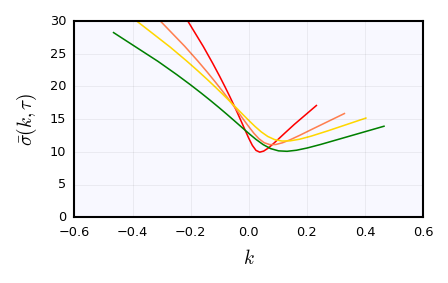

In [287]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
    axes.set_ylim([0,30])

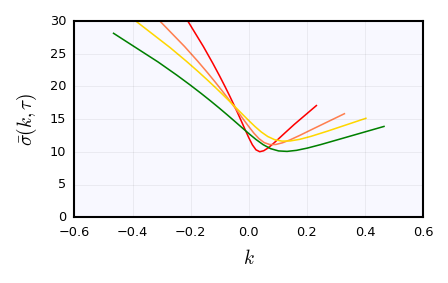

In [278]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
    axes.set_ylim([0,30])